In [60]:
print("all ok")

all ok


In [61]:
from dotenv import load_dotenv
import os
load_dotenv()

True

In [62]:
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

In [63]:
if not OPENAI_API_KEY:
    raise ValueError("OPENAI_API_KEY is missing in your .env")
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

In [64]:
from langchain_openai import ChatOpenAI

In [65]:
chat_llm = ChatOpenAI(model="gpt-4o-mini")

In [66]:
chat_llm.invoke("Hello, how are you?").content


"Hello! I'm just a program, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?"

In [8]:
from typing_extensions import TypedDict, Annotated
import operator

In [9]:
from langchain_core.messages import AnyMessage, HumanMessage, AIMessage

In [11]:
class GraphState(TypedDict):
    messages: Annotated[list[AnyMessage], operator.add]

In [ ]:
{
    "messages": [HumanMessage(content="Hi, this is Sunny. Say hello in detail.")]
}

In [ ]:
["hi"]

In [ ]:
["hi","how are you?"]

In [12]:
def llm_call(state: GraphState) -> dict:
    """Call the LLM using conversation messages and append AI response."""
    response = chat_llm.invoke(state["messages"])  # AIMessage
    return {
        "messages": [response]
    }


In [13]:
def token_counter(state: GraphState) -> dict:
    """Count tokens (simple word count) in the last AI message."""
    last_msg = state["messages"][-1]
    text = last_msg.content
    token_number = len(text.split())
    summary = f"Total token number in the generated answer (word count) is {token_number}"
    return {
        "messages": [AIMessage(content=summary)]
    }


In [14]:
from langgraph.graph import StateGraph

In [15]:
builder = StateGraph(GraphState)

In [16]:
builder.add_node("llm_call", llm_call)
builder.add_node("token_counter", token_counter)

In [17]:
builder.set_entry_point("llm_call")
builder.add_edge("llm_call", "token_counter")
builder.set_finish_point("token_counter")


In [18]:
app = builder.compile()

In [19]:
app.get_graph()

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=RunnableCallable(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'llm_call': Node(id='llm_call', name='llm_call', data=llm_call(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'token_counter': Node(id='token_counter', name='token_counter', data=token_counter(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='llm_call', data=None, conditional=False), Edge(source='llm_call', target='token_counter', data=None, conditional=False), Edge(source='token_counter', target='__end__', data=None, conditional=False)])

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=RunnableCallable(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'llm_call': Node(id='llm_call', name='llm_call', data=llm_call(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'token_counter': Node(id='token_counter', name='token_counter', data=token_counter(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='llm_call', data=None, conditional=False), Edge(source='llm_call', target='token_counter', data=None, conditional=False), Edge(source='token_counter', target='__end__', data=None, conditional=False)])

In [21]:
from IPython.display import Image, display

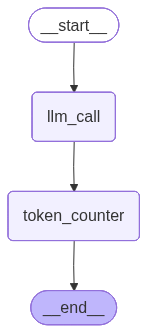

In [22]:
display(Image(app.get_graph().draw_mermaid_png()))

In [23]:
result = app.invoke({
    "messages": [HumanMessage(content="Hi, this is Sunny. Say hello in detail.")]
})

In [24]:
result

{'messages': [HumanMessage(content='Hi, this is Sunny. Say hello in detail.', additional_kwargs={}, response_metadata={}),
  AIMessage(content="Hello, Sunny! It’s a pleasure to connect with you. I hope you're having a wonderful day. How can I assist you today? Whether you have questions, need information, or just want to chat, I’m here to help!", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 48, 'prompt_tokens': 18, 'total_tokens': 66, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f4ae844694', 'id': 'chatcmpl-D7l898suULA8Dn8SdMdnoIrv3EVmG', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019c4870-27f8-7d11-97c1-57af47d347b6-0', tool_calls=[], invalid_tool_

In [25]:
for m in result["messages"]:
    print(type(m).__name__, ":", m.content)

HumanMessage : Hi, this is Sunny. Say hello in detail.
AIMessage : Hello, Sunny! It’s a pleasure to connect with you. I hope you're having a wonderful day. How can I assist you today? Whether you have questions, need information, or just want to chat, I’m here to help!
AIMessage : Total token number in the generated answer (word count) is 37


In [67]:
chat_llm

ChatOpenAI(profile={'max_input_tokens': 128000, 'max_output_tokens': 16384, 'image_inputs': True, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'pdf_inputs': True, 'pdf_tool_message': True, 'image_tool_message': True, 'tool_choice': True}, client=<openai.resources.chat.completions.completions.Completions object at 0x000001D3CA085C70>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x000001D3C9BC1BB0>, root_client=<openai.OpenAI object at 0x000001D3CA086ED0>, root_async_client=<openai.AsyncOpenAI object at 0x000001D3C9BB4B30>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'), stream_usage=True)

In [68]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

In [69]:
api_wrapper=WikipediaAPIWrapper(top_k_results=5,doc_content_chars_max= 500)

In [70]:
wiki_tool=WikipediaQueryRun(api_wrapper=api_wrapper)

In [71]:
wiki_tool.run({"query":"Generative AI"})

'Page: Generative artificial intelligence\nSummary: Generative artificial intelligence, also known as generative AI or GenAI, is a subfield of artificial intelligence that uses generative models to generate text, images, videos, audio, software code or other forms of data.\nThese models learn the underlying patterns and structures of their training data and use them to generate new data\nin response to input, which often takes the form of natural language prompts.\nThe generated material is often cal'

'Page: Generative artificial intelligence\nSummary: Generative artificial intelligence, also known as generative AI or GenAI, is a subfield of artificial intelligence that uses generative models to generate text, images, videos, audio, software code or other forms of data.\nThese models learn the underlying patterns and structures of their training data and use them to generate new data\nin response to input, which often takes the form of natural language prompts.\nThe generated material is often cal'

In [72]:
import os
from langchain_community.tools.tavily_search import TavilySearchResults
TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")

In [73]:
TAVILY_API_KEY


'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'

In [74]:
tool=TavilySearchResults(tavily_api_key=TAVILY_API_KEY)

In [75]:
tool.invoke({"query":"how is the job market for fresh graduates in 2026?"})

[{'title': 'Employers warn of tough job market for Class of 2026 - LinkedIn',
  'url': 'https://www.linkedin.com/posts/ray-smith-61a6262_companies-predict-2026-will-be-the-worst-activity-7395085970297225216-Gfe4',
  'content': 'For college seniors, that means they are also competing against junior workers who have been recently laid off. The unemployment rate for recent college graduates was 4.8% in June, greater than overall unemployment that month and the highest June level for recent graduates in four years, according to a Federal Reserve Bank of New York analysis. Christine Cruzvergara, Handshake’s chief education strategy officer, said employers are falling into three buckets. Some have paused hiring amid economic uncertainty, some have laid off staff in the name of efficiency and some are growing modestly. Fields seeing job growth include healthcare, education and manufacturing, she said. Meanwhile, students are applying “to hundreds and hundreds of jobs. They just shoot off appl

In [76]:
from langchain_community.tools import DuckDuckGoSearchRun
search=DuckDuckGoSearchRun()

In [77]:
search.invoke("what is the latest update on iphone17 release?")

'iPhone 17 release date. New iPhone models for 2025 were unveiled on Tuesday, September 9, 2025. Pre-orders started on Friday, September 12, 2025, with orders to start being delivered on September 19, 2025. Apple iPhone 17 features, new Apple iPhone release , iPhone 17 innovations, latest iPhone technology, Apple smartphone updates , iPhone 17 review, new iPhone specifications, Apple mobile launch, iPhone 17 camera enhancements, iPhone 17 battery life. Apple’s first iPhone update of the new year will be iOS 26.3, which just recently debuted in beta. Here’s the expected iOS 26.3 release date for all users. However, the base iPhone 17 and 17 Air could continue using the A18 chip, which is the same one powering the iPhone 16.The buying decision of users will likely depend on how many upgrades Apple is able to offer with the latest version and which one will offer more value for money. Apple has released iOS 26.3 and iPadOS 26.3 updates for iPhone and iPad, and they are now available for d

'iPhone 17 release date. New iPhone models for 2025 were unveiled on Tuesday, September 9, 2025. Pre-orders started on Friday, September 12, 2025, with orders to start being delivered on September 19, 2025. Apple iPhone 17 features, new Apple iPhone release , iPhone 17 innovations, latest iPhone technology, Apple smartphone updates , iPhone 17 review, new iPhone specifications, Apple mobile launch, iPhone 17 camera enhancements, iPhone 17 battery life. Apple’s first iPhone update of the new year will be iOS 26.3, which just recently debuted in beta. Here’s the expected iOS 26.3 release date for all users. However, the base iPhone 17 and 17 Air could continue using the A18 chip, which is the same one powering the iPhone 16.The buying decision of users will likely depend on how many upgrades Apple is able to offer with the latest version and which one will offer more value for money. Apple has released iOS 26.3 and iPadOS 26.3 updates for iPhone and iPad, and they are now available for download. The update has been released for all devices that run iOS 26.3.'

In [ ]:
bingsearch, googleserperapi

In [78]:
from langchain_community.tools import YouTubeSearchTool

In [79]:
tool=YouTubeSearchTool()

In [80]:
tool.name

'youtube_search'

In [81]:
tool.description

'search for youtube videos associated with a person. the input to this tool should be a comma separated list, the first part contains a person name and the second a number that is the maximum number of video results to return aka num_results. the second part is optional'

In [82]:
tool.run("krish naik")

"['https://www.youtube.com/watch?v=rZ_bRHWgYHU&pp=ygUKa3Jpc2ggbmFpaw%3D%3D', 'https://www.youtube.com/watch?v=I3CWFDgqvq8&pp=ygUKa3Jpc2ggbmFpaw%3D%3D']"

In [83]:
tool.run("sunny savita")

"['https://www.youtube.com/watch?v=ENzZuvahKwc&pp=ygUMc3Vubnkgc2F2aXRh', 'https://www.youtube.com/watch?v=4JU3eshdu4U&pp=ygUMc3Vubnkgc2F2aXRh']"

In [84]:
def multiply(a:int,b:int) -> int:
    return a*b

In [85]:
multiply(10,20)

200

In [87]:
multiply.invoke(10,20)

AttributeError: 'function' object has no attribute 'invoke'

In [86]:
multiply.invoke({"a":10,"b":20})

AttributeError: 'function' object has no attribute 'invoke'

In [89]:
from langchain.tools import tool

In [91]:
@tool
def multiply(a:int,b:int) -> int:
    '''this tool is for the multiplication'''
    return a*b

In [92]:
multiply.invoke({"a":10,"b":20})

200

In [93]:
multiply.name

'multiply'

In [94]:
multiply.description

'this tool is for the multiplication'

In [95]:
multiply.args

{'a': {'title': 'A', 'type': 'integer'},
 'b': {'title': 'B', 'type': 'integer'}}

In [97]:
@tool
def get_word_length(word:str) -> int:
    """it is a tool to count the length of the word"""
    return len(word)

In [98]:
get_word_length.invoke("hello world")

11

In [100]:
get_word_length.invoke({"word": "hello world"})

11

In [ ]:
@tool
def call_gmail_api(args):
    """this is a tool to call gmail api""" 
    pass

In [ ]:
@tool
def call_sqllite_db(args):
    """this is a tool to call sqllite db""" 
    pass

In [101]:
import yfinance as yf

In [102]:
@tool
def get_stock_price(ticker:str) -> str: 
    """this is a tool to get stock price using yfinance"""
    try:
        stock = yf.Ticker(ticker)

        # Get last 1 day historical data
        data = stock.history(period="1d")

        if data.empty:
            return f"No data found for ticker '{ticker}'. Please check the symbol."

        latest_close = data["Close"].iloc[-1]

        # Detect currency
        currency = stock.info.get("currency", "")
        symbol_map = {
            "INR": "₹",
            "USD": "$",
            "EUR": "€",
            "GBP": "£"
        }

        symbol = symbol_map.get(currency, "")
        currency_text = currency if currency else ""

        if symbol:
            return f"The last closing price of {ticker.upper()} was {symbol}{latest_close:.2f}."
        else:
            return f"The last closing price of {ticker.upper()} was {latest_close:.2f} {currency_text}."

    except Exception as e:
        return f"An error occurred while fetching stock data: {str(e)}"

    
    

In [103]:
get_stock_price.invoke("TCS.NS")

'The last closing price of TCS.NS was ₹2750.10.'

In [104]:
get_stock_price.invoke("AAPL")

'The last closing price of AAPL was $269.95.'

In [105]:
get_stock_price.invoke("TSLA")

'The last closing price of TSLA was $426.07.'

In [106]:
get_stock_price.invoke("HDFCBANK.NS")

'The last closing price of HDFCBANK.NS was ₹920.60.'

In [ ]:
[get_stock_price,get_word_length,multiply]

[StructuredTool(name='get_stock_price', description='this is a tool to get stock price using yfinance', args_schema=<class 'langchain_core.utils.pydantic.get_stock_price'>, func=<function get_stock_price at 0x000001D3CAC0B6A0>),
 StructuredTool(name='get_word_length', description='it is a tool to count the length of the word', args_schema=<class 'langchain_core.utils.pydantic.get_word_length'>, func=<function get_word_length at 0x000001D3CB4FB560>),
 StructuredTool(name='get_stock_price', description='this is a tool to get stock price using yfinance', args_schema=<class 'langchain_core.utils.pydantic.get_stock_price'>, func=<function get_stock_price at 0x000001D3CAC0B6A0>)]

In [142]:
tools = [get_stock_price,get_word_length,multiply,wiki_tool]

In [143]:
chat_llm

ChatOpenAI(profile={'max_input_tokens': 128000, 'max_output_tokens': 16384, 'image_inputs': True, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'pdf_inputs': True, 'pdf_tool_message': True, 'image_tool_message': True, 'tool_choice': True}, client=<openai.resources.chat.completions.completions.Completions object at 0x000001D3CA085C70>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x000001D3C9BC1BB0>, root_client=<openai.OpenAI object at 0x000001D3CA086ED0>, root_async_client=<openai.AsyncOpenAI object at 0x000001D3C9BB4B30>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'), stream_usage=True)

In [144]:
llm_with_tools=chat_llm.bind_tools(tools)

In [145]:
chat_llm

ChatOpenAI(profile={'max_input_tokens': 128000, 'max_output_tokens': 16384, 'image_inputs': True, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'pdf_inputs': True, 'pdf_tool_message': True, 'image_tool_message': True, 'tool_choice': True}, client=<openai.resources.chat.completions.completions.Completions object at 0x000001D3CA085C70>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x000001D3C9BC1BB0>, root_client=<openai.OpenAI object at 0x000001D3CA086ED0>, root_async_client=<openai.AsyncOpenAI object at 0x000001D3C9BB4B30>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'), stream_usage=True)

In [146]:
result = llm_with_tools.invoke("what is the stock price of TCS.NS?")

In [126]:
result

AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 112, 'total_tokens': 130, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f4ae844694', 'id': 'chatcmpl-D8TVUB5unc5xhMrB47dECOLWYNwoF', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019c529b-0e23-7bc0-97b5-d7539807a7dd-0', tool_calls=[{'name': 'get_stock_price', 'args': {'ticker': 'TCS.NS'}, 'id': 'call_rIyDgVQjdp2nuignlxCdUkND', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 112, 'output_tokens': 18, 'total_tokens': 130, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [127]:
result.content

''

In [128]:
result.tool_calls

[{'name': 'get_stock_price',
  'args': {'ticker': 'TCS.NS'},
  'id': 'call_rIyDgVQjdp2nuignlxCdUkND',
  'type': 'tool_call'}]

In [129]:
result = llm_with_tools.invoke("how many words are there in the sentence 'hello world, this is a test sentence?'")

In [130]:
result.content

''

In [131]:
result.tool_calls

[{'name': 'get_word_length',
  'args': {'word': 'hello world, this is a test sentence'},
  'id': 'call_G3GgrsEvXqwGziJtTvfuKUUe',
  'type': 'tool_call'}]

In [132]:
result = llm_with_tools.invoke("can you multiply 10 and 20?")

In [133]:
result.content

''

In [134]:
result.tool_calls

[{'name': 'multiply',
  'args': {'a': 10, 'b': 20},
  'id': 'call_NgR1cO4dM7C8mW5fVPgMSF0O',
  'type': 'tool_call'}]

In [136]:
result = llm_with_tools.invoke("hi how are you?")

In [137]:
result.content

"I'm just a program, but I'm here and ready to help you! How can I assist you today?"

In [138]:
result.tool_calls

[]

In [139]:
result = llm_with_tools.invoke("what was in the latest indian union budget report of 2026?")

In [140]:
result.content

'I currently do not have access to real-time data or updates, including the latest reports or documents. To get the latest information on the Indian Union Budget for 2026, I recommend checking official government websites or trusted news sources for the most accurate and up-to-date information.'

'I currently do not have access to real-time data or updates, including the latest reports or documents. To get the latest information on the Indian Union Budget for 2026, I recommend checking official government websites or trusted news sources for the most accurate and up-to-date information.'

In [141]:
result.tool_calls

[]

In [147]:
result = llm_with_tools.invoke("what was in the latest indian union budget report of 2026?")

In [148]:
result.content

''

In [149]:
result.tool_calls

[{'name': 'wikipedia',
  'args': {'query': 'Indian Union Budget 2026'},
  'id': 'call_mnDFuR36mG13Jq6KbhVQwyGd',
  'type': 'tool_call'}]

In [ ]:
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import MessagesState,StateGraph, END, START